In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ratings = pd.read_csv(
    "../data/raw/ratings.dat",
    sep="::",
    engine="python",
    encoding="latin-1",
    names=["user_id", "movie_id", "rating", "timestamp"]
)

users = pd.read_csv(
    "../data/raw/users.dat",
    sep="::",
    encoding="latin-1",
    engine="python",
    names=["user_id", "gender", "age", "occupation", "zip"]
)

movies = pd.read_csv(
    "../data/raw/movies.dat",
    sep="::",
    encoding="latin-1",
    engine="python",
    names=["movie_id", "title", "genres"]
)


In [3]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
ratings.shape

(1000209, 4)

In [5]:
ratings.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [6]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
users.shape

(6040, 5)

In [8]:
users.isnull().sum()

user_id       0
gender        0
age           0
occupation    0
zip           0
dtype: int64

In [9]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movies.shape

(3883, 3)

In [11]:
movies.isnull().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [12]:
ratings["rating"].value_counts().sort_index()


rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: count, dtype: int64

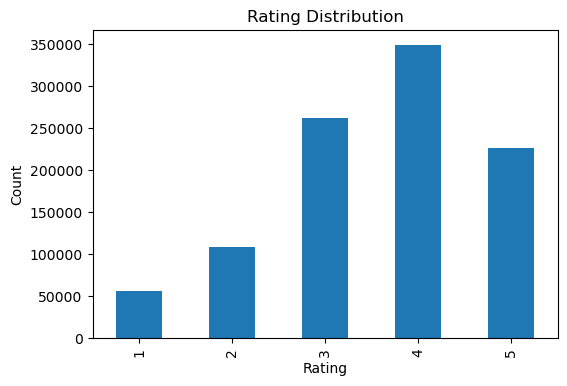

In [13]:
ratings["rating"].value_counts().sort_index().plot(
    kind="bar",
    figsize=(6,4),
    title="Rating Distribution"
)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [14]:
ratings["user_id"].nunique()

6040

In [15]:
ratings["movie_id"].nunique()

3706

In [16]:
user_activity = ratings.groupby("user_id").size()

user_activity.describe()


count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
dtype: float64

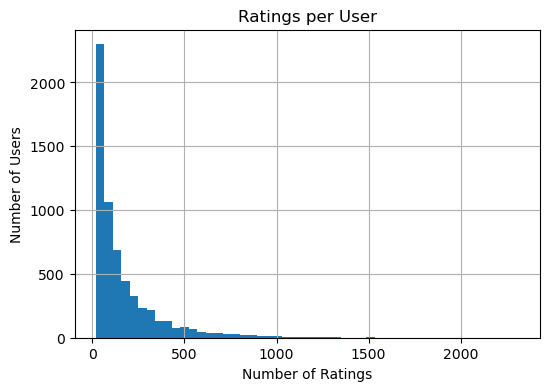

In [17]:
user_activity.hist(bins=50, figsize=(6,4))
plt.title("Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()


In [18]:
movie_popularity = ratings.groupby("movie_id").size()

movie_popularity.describe()


count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
dtype: float64

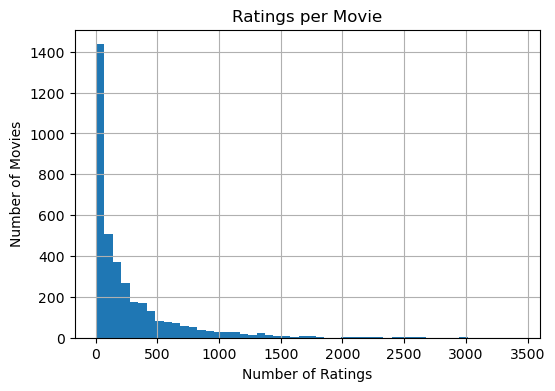

In [19]:
movie_popularity.hist(bins=50, figsize=(6,4))
plt.title("Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()


In [20]:
n_users = ratings["user_id"].nunique()
n_movies = ratings["movie_id"].nunique()
n_interactions = len(ratings)

sparsity = 1 - (n_interactions / (n_users * n_movies))
sparsity


0.9553163743776871

In [21]:
ratings.groupby("user_id")["rating"].mean().describe()


count    6040.000000
mean        3.702705
std         0.429622
min         1.015385
25%         3.444444
50%         3.735294
75%         4.000000
max         4.962963
Name: rating, dtype: float64

In [22]:
ratings.groupby("movie_id")["rating"].mean().describe()

count    3706.000000
mean        3.238892
std         0.672925
min         1.000000
25%         2.822705
50%         3.331546
75%         3.740741
max         5.000000
Name: rating, dtype: float64

In [23]:
ratings["timestamp"].describe()


count    1.000209e+06
mean     9.722437e+08
std      1.215256e+07
min      9.567039e+08
25%      9.653026e+08
50%      9.730180e+08
75%      9.752209e+08
max      1.046455e+09
Name: timestamp, dtype: float64

🔑 Key Insights from Data Understanding

The dataset contains ~1M user–movie interactions with ~6K users and ~3.7K movies.

The user–item interaction matrix is highly sparse, a key challenge for collaborative filtering.

User activity and movie popularity follow a long-tail distribution.

Rating distributions show user and item bias, suggesting normalization may help.

These characteristics motivate the use of collaborative filtering, with possible extensions to content-based or hybrid models.